# Analysing the Gender Paygap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install sklearn

     |████████████████████████████████| 22.3MB 965kB/s eta 0:00:01.9MB 4.6MB/s eta 0:00:05
     |████████████████████████████████| 307kB 18.8MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=9c73b609c92e4d6f8a00d5fcee7ba751baf5acae9f9c298d85eef7b0eda8fc5b
  Stored in directory: /home/jovyan/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
pip install lightgbm

     |████████████████████████████████| 2.0MB 4.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

In [7]:
df = pd.read_csv("multipleChoiceResponses.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


## Data Treatment

### 1. Separate questions from answers

In [9]:
questions = df.iloc[0]
df_answers = df.drop(0, axis=0)
questions

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                What is your gender? - Selected Choice
Q1_OTHER_TEXT                          What is your gender? - Prefer to self-describe...
Q2                                                           What is your age (# years)?
Q3                                             In which country do you currently reside?
                                                             ...                        
Q50_Part_5                             What barriers prevent you from making your wor...
Q50_Part_6                             What barriers prevent you from making your wor...
Q50_Part_7                             What barriers prevent you from making your wor...
Q50_Part_8                             What barriers prevent you from making your wor...
Q50_OTHER_TEXT                         What barriers prevent you from making your wor...
Name: 0, Length: 395,

### 2. Subset of columns

In [10]:
df_short = df_answers[['Q1', 'Q2', 'Q3',
                       'Q4', 'Q5', 'Q6',
                       'Q7', 'Q8', 'Q9']].rename(columns = {'Q1':'Gender', 'Q2':'Age', 'Q3':'Country',
                                                            'Q4':'Education', 'Q5':'FieldOfStudies',
                                                            'Q6':'JobTitle', 'Q7':'Industry','Q8':'Experience',
                                                            'Q9':'YearlyCompensation'})
df_short.head()

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience,YearlyCompensation
1,Female,45-49,United States of America,Doctoral degree,Other,Consultant,Other,NaN,NaN
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000"
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000"
4,Male,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,NaN,NaN,NaN
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000"


### 3. Treat Missing values

In [11]:
df_short = df_short.fillna('Unknown')
df_short['Gender'].value_counts()

Male                       19430
Female                      4010
Prefer not to say            340
Prefer to self-describe       79
Name: Gender, dtype: int64

In [12]:
df_short = df_short[(df_short['Gender'] == 'Male') | (df_short['Gender'] == 'Female') ]

In [13]:
df_short['YearlyCompensation'].value_counts()

I do not wish to disclose my approximate yearly compensation    4623
0-10,000                                                        4363
Unknown                                                         3571
10-20,000                                                       1909
20-30,000                                                       1380
30-40,000                                                       1109
40-50,000                                                        950
50-60,000                                                        908
100-125,000                                                      831
60-70,000                                                        723
70-80,000                                                        673
90-100,000                                                       559
125-150,000                                                      528
80-90,000                                                        500
150-200,000                       

In [14]:
df_unknown = df_short[(df_short['YearlyCompensation'] == 'Unkown')
                      | (df_short['YearlyCompensation'] == 'I do not wish to disclose my approximate yearly compensation')]
df_unknown.head()

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience,YearlyCompensation
6,Male,25-29,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,Computers/Technology,0-1,I do not wish to disclose my approximate yearl...
11,Male,22-24,Ireland,Bachelor’s degree,"Information technology, networking, or system ...",Student,I am a student,3-4,I do not wish to disclose my approximate yearl...
34,Female,25-29,China,Master’s degree,"Computer science (software engineering, etc.)",Data Analyst,Energy/Mining,2-3,I do not wish to disclose my approximate yearl...
37,Male,40-44,India,Bachelor’s degree,Engineering (non-computer focused),Software Engineer,Computers/Technology,10-15,I do not wish to disclose my approximate yearl...
49,Male,45-49,Austria,Professional degree,Mathematics or statistics,Research Scientist,Academics/Education,5-10,I do not wish to disclose my approximate yearl...


In [15]:
df_short = df_short[(df_short['YearlyCompensation'] != 'I do not wish to disclose my approximate yearly compensation')
                    & (df_short['YearlyCompensation'] != 'Unknown')]
df_short.head()

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience,YearlyCompensation
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000"
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000"
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000"
7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000"
8,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000"


### 4. Convert some categorical values into numerical values

In [16]:
dic_age = {'18-21':19.5, '22-24':23, '25-29':27, '30-34':32, '35-39':37, '40-44':42, '45-49':47, '50-54':52,
           '55-59':57, '60-69':64.5, '70-79':74.5, '80+':80}
df_short['Age'] = df_short['Age'].apply(lambda x: dic_age[x])

In [17]:
dic_exp = {'0-1':0.5, '1-2':1.5, '2-3':2.5, '3-4':3.5, '4-5':4.5, '5-10':7.5, '10-15':12.5, '15-20':17.5,
           '20-25':22.5, '25-30':27.5, '30 +':30, 'Unknown':0}
df_short['Experience'] = df_short['Experience'].apply(lambda x: dic_exp[x])

In [18]:
dic_salary = {'0-10,000':5000, '10-20,000':15000, '20-30,000':25000, '30-40,000':35000, '40-50,000':45000,
              '50-60,000':55000, '60-70,000':65000, '70-80,000':75000, '80-90,000':85000, '90-100,000':95000,
              '100-125,000':112500, '125-150,000':137500, '150-200,000':175000, '200-250,000':225000,
              '250-300,000':275000, '500,000+':500000, '300-400,000':350000, '400-500,000':450000}
df_short['YearlyCompensation'] = df_short['YearlyCompensation'].apply(lambda x: dic_salary[x])
df_short.head()

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience,YearlyCompensation
2,Male,32.0,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,7.5,15000
3,Female,32.0,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0.5,5000
5,Male,23.0,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0.5,5000
7,Male,37.0,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,12.5,15000
8,Male,19.5,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0.5,5000


## Exploratory Data Analysis

<AxesSubplot:xlabel='Education', ylabel='YearlyCompensation'>

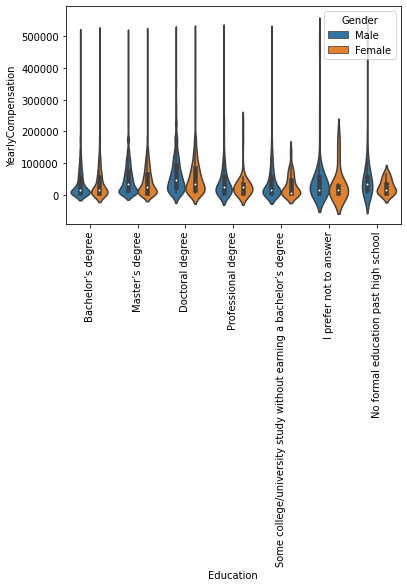

In [19]:
edu_gen_vin = sns.violinplot(data=df_short, x='Education', y='YearlyCompensation', hue='Gender')
edu_gen_vin.set_xticklabels(edu_gen_vin.get_xticklabels(),rotation=90)
edu_gen_vin

Hypothesis: Man without proper education/background manage to reach high-earning positions, while women are more dependent from their educational background

<AxesSubplot:xlabel='Education', ylabel='count'>

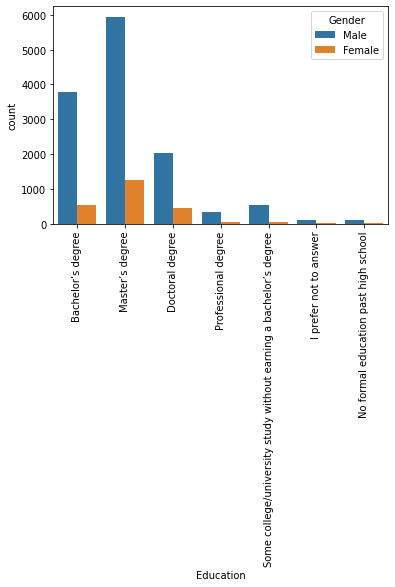

In [20]:
edu_gen = sns.countplot(data=df_short, x='Education', hue='Gender')
edu_gen.set_xticklabels(edu_gen.get_xticklabels(),rotation=90)
edu_gen

Follow up: It might just be a reflection from a lower amount of women in the field.

Question: Are there more men or women choosing not to give their yearly compensation?

<AxesSubplot:xlabel='Gender', ylabel='count'>

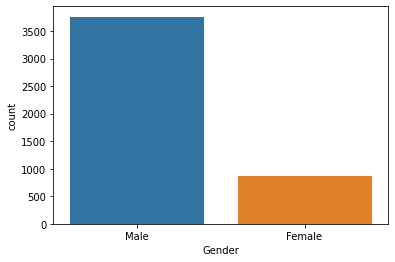

In [21]:
sns.countplot(data=df_unknown, x='Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

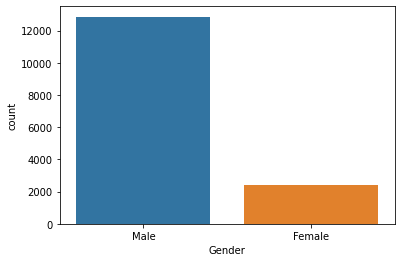

In [22]:
sns.countplot(data=df_short, x='Gender')

In [23]:
3500/(12000+3500) # share of men not sharing their yearly compensation

0.22580645161290322

In [24]:
1000/(2000+1000) # share of women not sharing their yearly compensation

0.3333333333333333

Answer: quite similar.

<AxesSubplot:xlabel='JobTitle', ylabel='YearlyCompensation'>

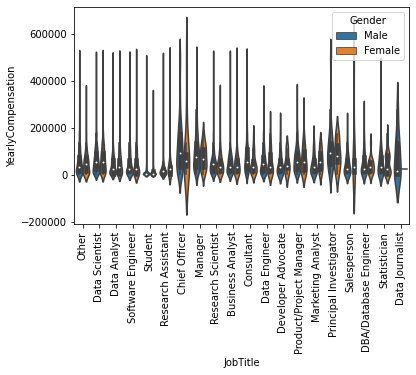

In [25]:
job_gen_vin = sns.violinplot(data=df_short, x='JobTitle', y='YearlyCompensation', hue='Gender')
job_gen_vin.set_xticklabels(job_gen_vin.get_xticklabels(),rotation=90)
job_gen_vin

<AxesSubplot:xlabel='JobTitle', ylabel='YearlyCompensation'>

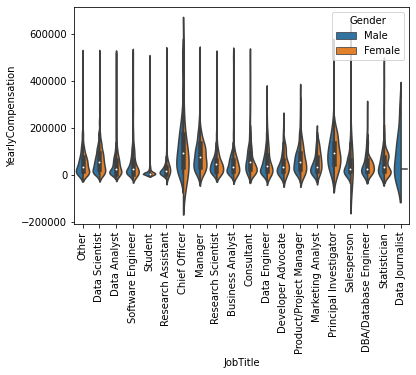

In [26]:
job_gen_vin = sns.violinplot(data=df_short, x='JobTitle', y='YearlyCompensation', hue='Gender', split=True)
job_gen_vin.set_xticklabels(job_gen_vin.get_xticklabels(),rotation=90)
job_gen_vin

Note: There's a bigger salary range for women as Chief Officer or Salesperson, in comparison to men

## Prepare for the Model

### 1. Define labels and features

In [27]:
labels_col = 'YearlyCompensation'
y = df_short[labels_col]
x = df_short.drop(columns=[labels_col], axis=1)

### 2. Scale numerical variables

In [28]:
num_variables = ['Age', 'Experience']
x[num_variables] = StandardScaler().fit_transform(x[num_variables])

### 3. Encode categorical variables

In [29]:
cat_variables = ['Gender', 'Country', 'Education', 'FieldOfStudies', 'JobTitle', 'Industry', 'Experience']
for col in cat_variables:
  x[col] = x[col].astype('category')
x[cat_variables] = x[cat_variables].apply(lambda x: x.cat.codes)

## Train a ML model

In [30]:
model = LGBMClassifier()
model.fit(x, y)

LGBMClassifier()

## Features Importance

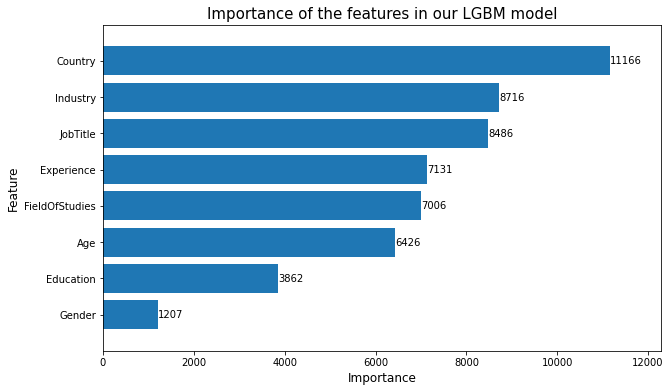

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
plt.title('Importance of the features in our LGBM model', fontsize=15)
plt.show()